In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings

warnings.simplefilter("ignore")

In [3]:
# Load Netflix dataset
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [4]:
# Show first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Check for missing values
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [7]:
# Fill missing 'country' with 'Unknown'
df['country'].fillna("Unknown", inplace=True)

# Fill missing 'rating' with the most common rating
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Fill missing 'duration' with 'Unknown'
df['duration'].fillna("Unknown", inplace=True)

In [8]:
df.drop(columns=['director', 'cast'], inplace=True)

In [9]:
print(df.isnull().sum())  # Should now show zero missing values
print("")
print(df.info())  # Check updated DataFrame structure

show_id          0
type             0
title            0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   country       8807 non-null   object
 4   date_added    8797 non-null   object
 5   release_year  8807 non-null   int64 
 6   rating        8807 non-null   object
 7   duration      8807 non-null   object
 8   listed_in     8807 non-null   object
 9   description   8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB
None


***Data Analysis & Visualizations***

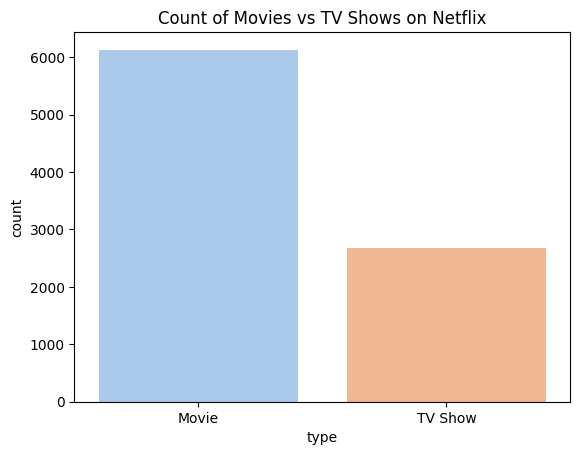

In [10]:
# Count of Movies vs TV Shows
sns.countplot(x='type', data=df, palette='pastel')
plt.title("Count of Movies vs TV Shows on Netflix")
plt.show()

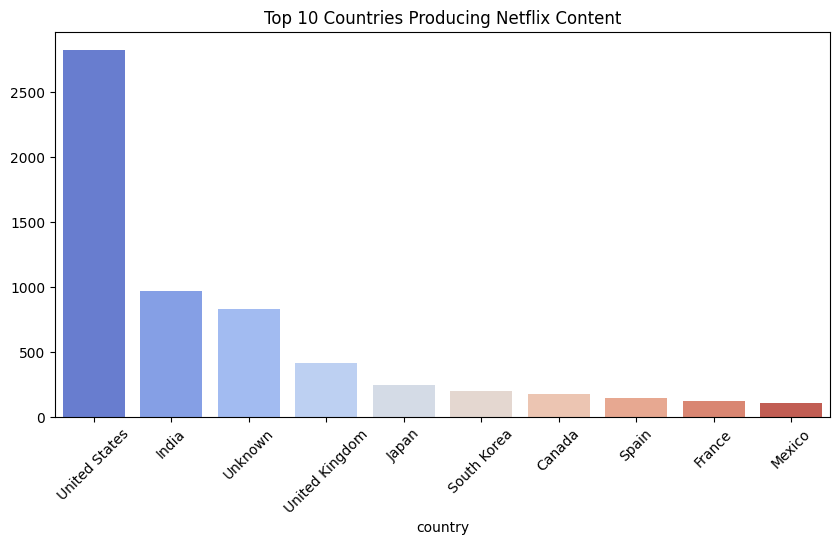

In [11]:
# Top 10 Countries Producing Content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Countries Producing Netflix Content")
plt.show()

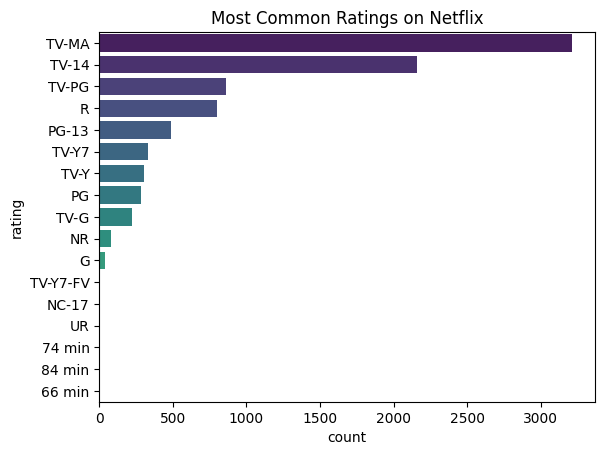

In [12]:
# Most Common Ratings
sns.countplot(y='rating', data=df, palette='viridis', order=df['rating'].value_counts().index)
plt.title("Most Common Ratings on Netflix")
plt.show()

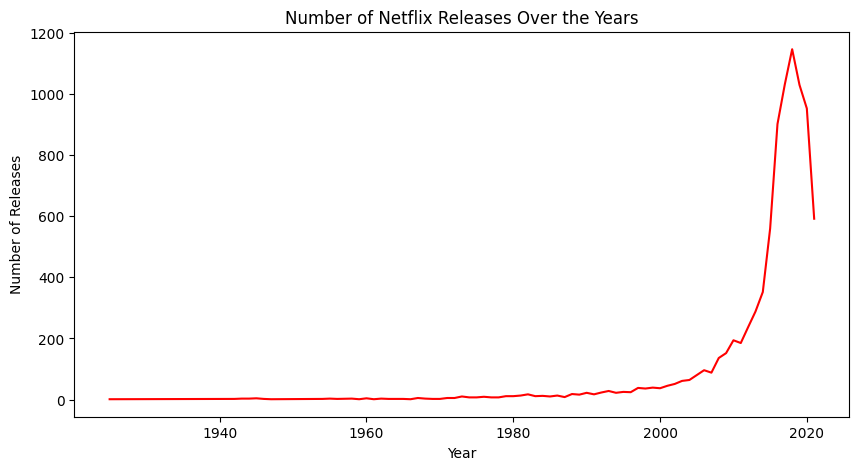

In [13]:
# Content Added Over Years
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,5), color='red')
plt.title("Number of Netflix Releases Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()

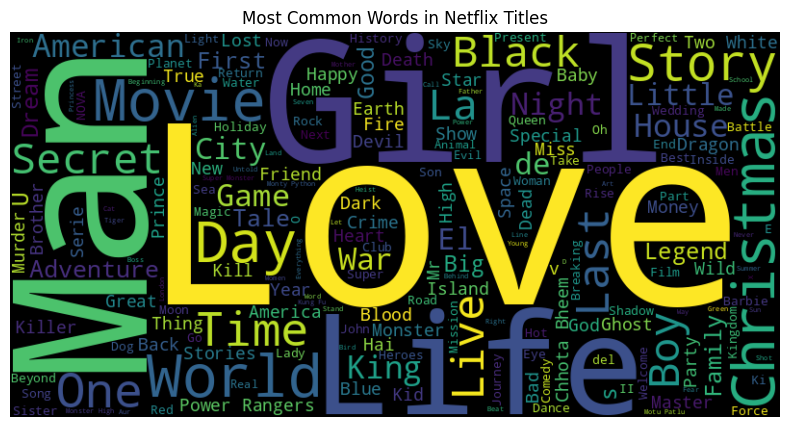

In [14]:
# WordCloud for Movie Titles
text = " ".join(title for title in df['title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Netflix Titles")
plt.show()